In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing


# Pasamos los CSV a DataFrames

In [2]:
training = pd.read_csv("./Input/train.csv", index_col=0)
print(training.shape)
training.head()

(40455, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [3]:
prediction = pd.read_csv("./Input/predict.csv", index_col=0)
print(prediction.shape)
prediction.head()

(13485, 9)


,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


# Pasamos a observar los datos para poder quedarnos con un dataset númerico 

In [4]:
print(training.dtypes)
training.isna().sum()

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
print(training['cut'].value_counts())
print(training['color'].value_counts())
training['clarity'].value_counts()


Ideal        16175
Premium      10272
Very Good     9146
Good          3676
Fair          1186
Name: cut, dtype: int64
G    8469
E    7375
F    7179
H    6229
D    5012
I    4088
J    2103
Name: color, dtype: int64


SI1     9813
VS2     9217
SI2     6844
VS1     6150
VVS2    3784
VVS1    2780
IF      1326
I1       541
Name: clarity, dtype: int64

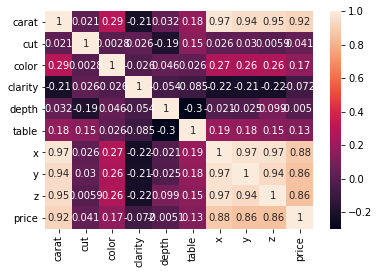

In [16]:
#Observamos la correlación de los datos (+ limpieza de datos más abajo)
correlacion_train = training.corr()
sns.heatmap(correlacion_train, annot=True)

In [18]:
#Pruebo con Label Encoder (poniendo los mismos parámetros en ambos datasets)
#columna CUT
ch_cut = training.cut.tolist()
cut_clean = set(ch_cut)
cut_clean = list(cut_clean)

le = preprocessing.LabelEncoder()
le.fit(cut_clean)

training['cut'] = le.transform(training.cut)
prediction['cut'] = le.transform(prediction.cut)
training.head()
prediction.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,2,5,3,60.8,54.0,8.68,8.57,5.24
1,2.04,2,4,3,62.0,56.0,8.18,8.23,5.09
2,0.51,2,5,2,61.7,54.0,5.18,5.19,3.20
3,0.30,2,5,2,61.3,56.0,4.32,4.33,2.65
4,0.96,0,4,5,68.8,56.0,6.11,5.98,4.16


In [19]:
#columna Color
ch_color = training.color.tolist()
color_clean = set(ch_color)
color_clean = list(color_clean)

le.fit(color_clean)

training['color'] = le.transform(training.color)
prediction['color'] = le.transform(prediction.color)

training.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,4,2,5,62.8,56.0,4.29,4.31,2.70,605
1,0.34,2,1,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,4,0,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,3,4,4,61.8,59.2,4.72,4.74,2.92,793
4,0.90,4,0,2,61.0,63.0,6.10,6.13,3.73,4381


In [20]:
#columna Clarity
ch_clarity = training.clarity.tolist()
clarity_clean = set(ch_clarity)
clarity_clean = list(clarity_clean)

le.fit(clarity_clean)

training['clarity'] = le.transform(training.clarity)
prediction['clarity'] = le.transform(prediction.clarity)

training.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,4,2,5,62.8,56.0,4.29,4.31,2.70,605
1,0.34,2,1,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,4,0,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,3,4,4,61.8,59.2,4.72,4.74,2.92,793
4,0.90,4,0,2,61.0,63.0,6.10,6.13,3.73,4381


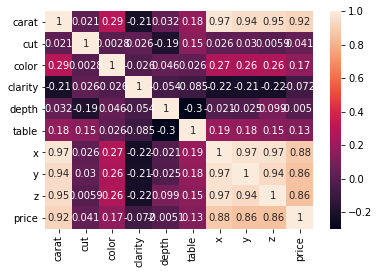

In [10]:
correlacion_train = training.corr()
sns.heatmap(correlacion_train, annot=True)

In [11]:
training.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797150,2.556569,2.598294,3.839748,61.746612,57.453561,5.729391,5.733217,3.537644,3928.715264
std,0.472872,1.027918,1.698944,1.722592,1.431006,2.235668,1.121283,1.151076,0.709557,3985.070609
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,946.500000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2398.000000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5328.500000
max,4.500000,4.000000,6.000000,7.000000,79.000000,95.000000,10.230000,58.900000,31.800000,18818.000000


In [21]:
# Guardar los csv limpios para el fichero de predicts

In [12]:
training.to_csv('./Output/clean_training_LE.csv')

In [15]:
prediction.to_csv('./Output/clean_prediction_LE.csv')

In [13]:
training.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,4,2,5,62.8,56.0,4.29,4.31,2.70,605
1,0.34,2,1,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,4,0,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,3,4,4,61.8,59.2,4.72,4.74,2.92,793
4,0.90,4,0,2,61.0,63.0,6.10,6.13,3.73,4381


In [14]:
prediction.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,2,5,3,60.8,54.0,8.68,8.57,5.24
1,2.04,2,4,3,62.0,56.0,8.18,8.23,5.09
2,0.51,2,5,2,61.7,54.0,5.18,5.19,3.20
3,0.30,2,5,2,61.3,56.0,4.32,4.33,2.65
4,0.96,0,4,5,68.8,56.0,6.11,5.98,4.16


# Prueba con las columnas con menos correlación